In [20]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Copyright 2016 Moscow Institute of Physics and Technology

"""Extract images from a rosbag.
"""

import os
import cv2
import rosbag
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import matplotlib.pyplot as plt
import collections

bag = rosbag.Bag('../data/ros_bags/2022-07-06-08-37-01-002.bag', 'r')
bridge = CvBridge()
count = 0
depth_data = dict()
image_data = dict()
for topic, msg, t in bag.read_messages(topics=['/realsense_back/color/image_raw', '/realsense_back/aligned_depth_to_color/image_raw']):
    #cv_img = bridge.imgmsg_to_cv2(msg, desired_encoding="32FC1")#, desired_encoding="passthrough")
    cv_img = bridge.imgmsg_to_cv2(msg, desired_encoding="passthrough")#, desired_encoding="passthrough")
    
    if '/realsense_back/aligned_depth_to_color/image_raw' == topic:
        depth_data[t.to_time()] = cv_img
    elif '/realsense_back/color/image_raw' == topic:
        image_data[t.to_time()] = cv_img
    else:
        NotImplementedError()

bag.close()

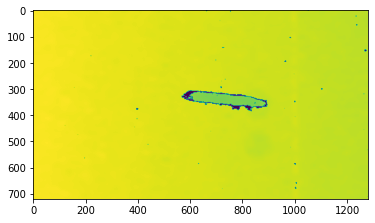

In [24]:
plt.imshow(depth_data[list(depth_data.keys())[100]])